In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [2]:
# adapted from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    if hasattr(svm_clf, "support_vectors_"):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
 def plot_data(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

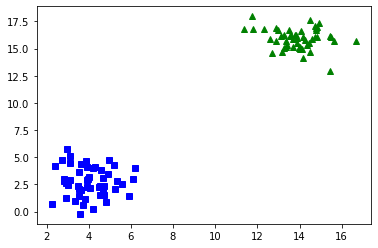

In [4]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20))
plot_data(X, y)

In [5]:
linear_svc = LinearSVC(loss="hinge", max_iter=10000)
svc = SVC(kernel="linear")
sgd_classifier = SGDClassifier(loss="hinge")

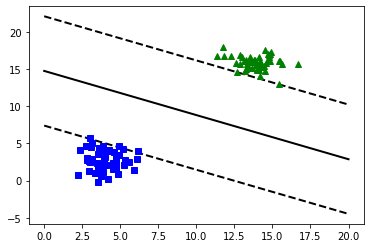

In [6]:
linear_svc.fit(X, y)

plot_svc_decision_boundary(linear_svc, 0, 20)
plot_data(X, y)

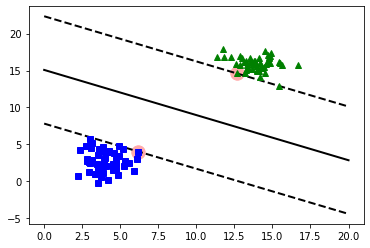

In [7]:
svc.fit(X, y)

plot_svc_decision_boundary(svc, 0, 20)
plot_data(X, y)

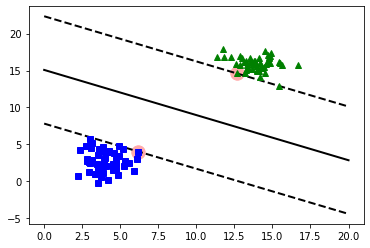

In [8]:
sgd_classifier.fit(X, y)

plot_svc_decision_boundary(svc, 0, 20)
plot_data(X, y)

In [9]:
print(f"linear_svc: {linear_svc.coef_}\nsvc: {svc.coef_}\nsvc: {svc.coef_}")

linear_svc: [[-0.08079268 -0.13576328]]
svc: [[-0.08413192 -0.13754677]]
svc: [[-0.08413192 -0.13754677]]


In [10]:

print(f"linear_svc: {linear_svc.intercept_}\nsvc: {svc.intercept_}\nsvc: {svc.intercept_}")

linear_svc: [2.00589739]
svc: [2.07427294]
svc: [2.07427294]
